In [1]:
# -*- coding: utf8

import sys
sys.path.append('../code/')

In [2]:
from amutils import build_graph
from amutils import build_reverse_index
from amutils import load_am_json_data

from scipy import stats as ss

from disrupt import compute_disruption

import ipywidgets as widgets
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

In [3]:
inches_per_pt = 1.0 / 72.27
fig_width = 240 * inches_per_pt  # width in inches
fig_height = 160 * inches_per_pt #.4 * fig_width

plt.rcParams['figure.figsize']  = (fig_width, fig_height)
plt.rcParams['axes.labelsize']  = 10
plt.rcParams['axes.titlesize']  = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['text.usetex'] = True

In [4]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (fig_width, fig_height)

In [5]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.tight_layout(pad=1)

In [6]:
json_data = load_am_json_data()
decades, genres, styles = build_reverse_index(json_data)
G = build_graph(json_data)
id_to_node = dict((i, n) for i, n in enumerate(G.nodes))
in_count = dict(G.in_degree(G.nodes))
out_count = dict(G.out_degree(G.nodes))

In [7]:
df = pd.read_csv('../data/disrupt.csv', index_col=0)
df['in'] = list(map(lambda x: in_count[x], df.index))
df['out'] = list(map(lambda x: out_count[x], df.index))
df.head()

,ni,nj,nk,disruption,name,confidence,in,out
mn0003013627,2.0,0.0,75.0,0.025974,Daughter,0.6747,2,2
mn0000206668,1.0,0.0,304.0,0.003279,Des'ree,0.5910,1,3
mn0000622805,236.0,56.0,1566.0,0.096878,Stevie Wonder,1.0000,292,12
mn0000576718,4.0,4.0,1986.0,0.000000,Seal,0.4939,8,20
mn0000302106,5.0,3.0,612.0,0.003226,Lisa Stansfield,0.6572,8,11


In [8]:
good = (df['in'] >= 3) & (df['out'] >= 3) & (df.index.isin(G.nodes))

In [9]:
disrupt_g = df[good]
disrupt_g = disrupt_g[disrupt_g['confidence'] > 0.95]

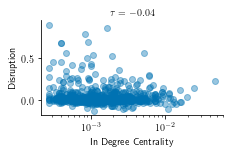

In [10]:
cen = nx.in_degree_centrality(G)
cen = pd.Series(cen).loc[disrupt_g.index]
plt.semilogx(cen, disrupt_g['disruption'], 'o', alpha=0.4)
plt.xlabel('In Degree Centrality')
plt.ylabel('Disruption')
plt.title(r'$\tau=%.2f$' % ss.kendalltau(cen, disrupt_g['disruption'])[0])
despine()
plt.savefig('in-degree.pdf')

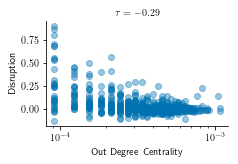

In [11]:
cen = nx.out_degree_centrality(G)
cen = pd.Series(cen).loc[disrupt_g.index]
plt.semilogx(cen, disrupt_g['disruption'], 'o', alpha=0.4)
plt.xlabel('Out Degree Centrality')
plt.ylabel('Disruption')
despine()
plt.title(r'$\tau=%.2f$' % ss.kendalltau(cen, disrupt_g['disruption'])[0])
plt.savefig('out-degree.pdf')

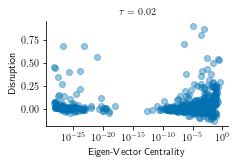

In [12]:
cen = nx.eigenvector_centrality(G)
cen = pd.Series(cen).loc[disrupt_g.index]
plt.semilogx(cen, disrupt_g['disruption'], 'o', alpha=0.4)
plt.xlabel('Eigen-Vector Centrality')
plt.ylabel('Disruption')
despine()
plt.title(r'$\tau=%.2f$' % ss.kendalltau(cen, disrupt_g['disruption'])[0])
plt.savefig('eigen.pdf')

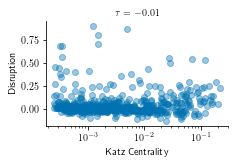

In [13]:
cen = nx.katz_centrality(G)
cen = pd.Series(cen).loc[disrupt_g.index]
plt.semilogx(cen, disrupt_g['disruption'], 'o', alpha=0.4)
plt.xlabel('Katz Centrality')
plt.ylabel('Disruption')
despine()
plt.title(r'$\tau=%.2f$' % ss.kendalltau(cen, disrupt_g['disruption'])[0])
plt.savefig('katz.pdf')

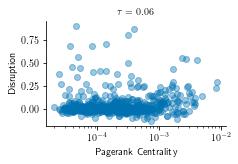

In [14]:
cen = nx.pagerank(G)
cen = pd.Series(cen).loc[disrupt_g.index]
plt.semilogx(cen, disrupt_g['disruption'], 'o', alpha=0.4)
plt.xlabel('Pagerank Centrality')
plt.ylabel('Disruption')
despine()
plt.title(r'$\tau=%.2f$' % ss.kendalltau(cen, disrupt_g['disruption'])[0])
plt.savefig('pagerank.pdf')

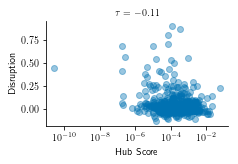

In [15]:
cen = nx.hits(G)[1]
cen = pd.Series(cen).loc[disrupt_g.index]
plt.semilogx(cen, disrupt_g['disruption'], 'o', alpha=0.4)
plt.xlabel('Hub Score')
plt.ylabel('Disruption')
despine()
plt.title(r'$\tau=%.2f$' % ss.kendalltau(cen, disrupt_g['disruption'])[0])
plt.savefig('hub.pdf')

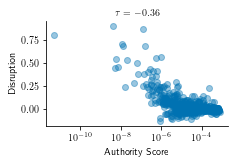

In [16]:
cen = nx.hits(G)[0]
cen = pd.Series(cen).loc[disrupt_g.index]
plt.semilogx(cen, disrupt_g['disruption'], 'o', alpha=0.4)
plt.xlabel('Authority Score')
plt.ylabel('Disruption')
despine()
plt.title(r'$\tau=%.2f$' % ss.kendalltau(cen, disrupt_g['disruption'])[0])
plt.savefig('auth.pdf')